<a href="https://colab.research.google.com/github/RohitPasumarty/ML/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Prediciton**
Rohit Pasumarty
<br/>Github Link - https://github.com/RohitPasumarty

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

## **Exploratory Data Analysis and Visualization**

In [ ]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.iloc[:,-1] = df.iloc[:,-1].fillna(55)
df.drop(['id','Unnamed: 32'], inplace=True, axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Visualizing each feature

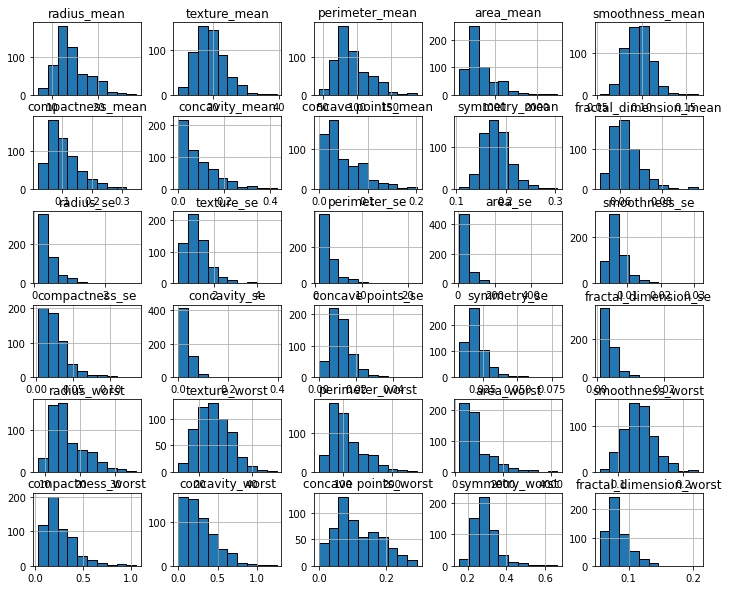

In [ ]:
df.hist(edgecolor='black', linewidth=1)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

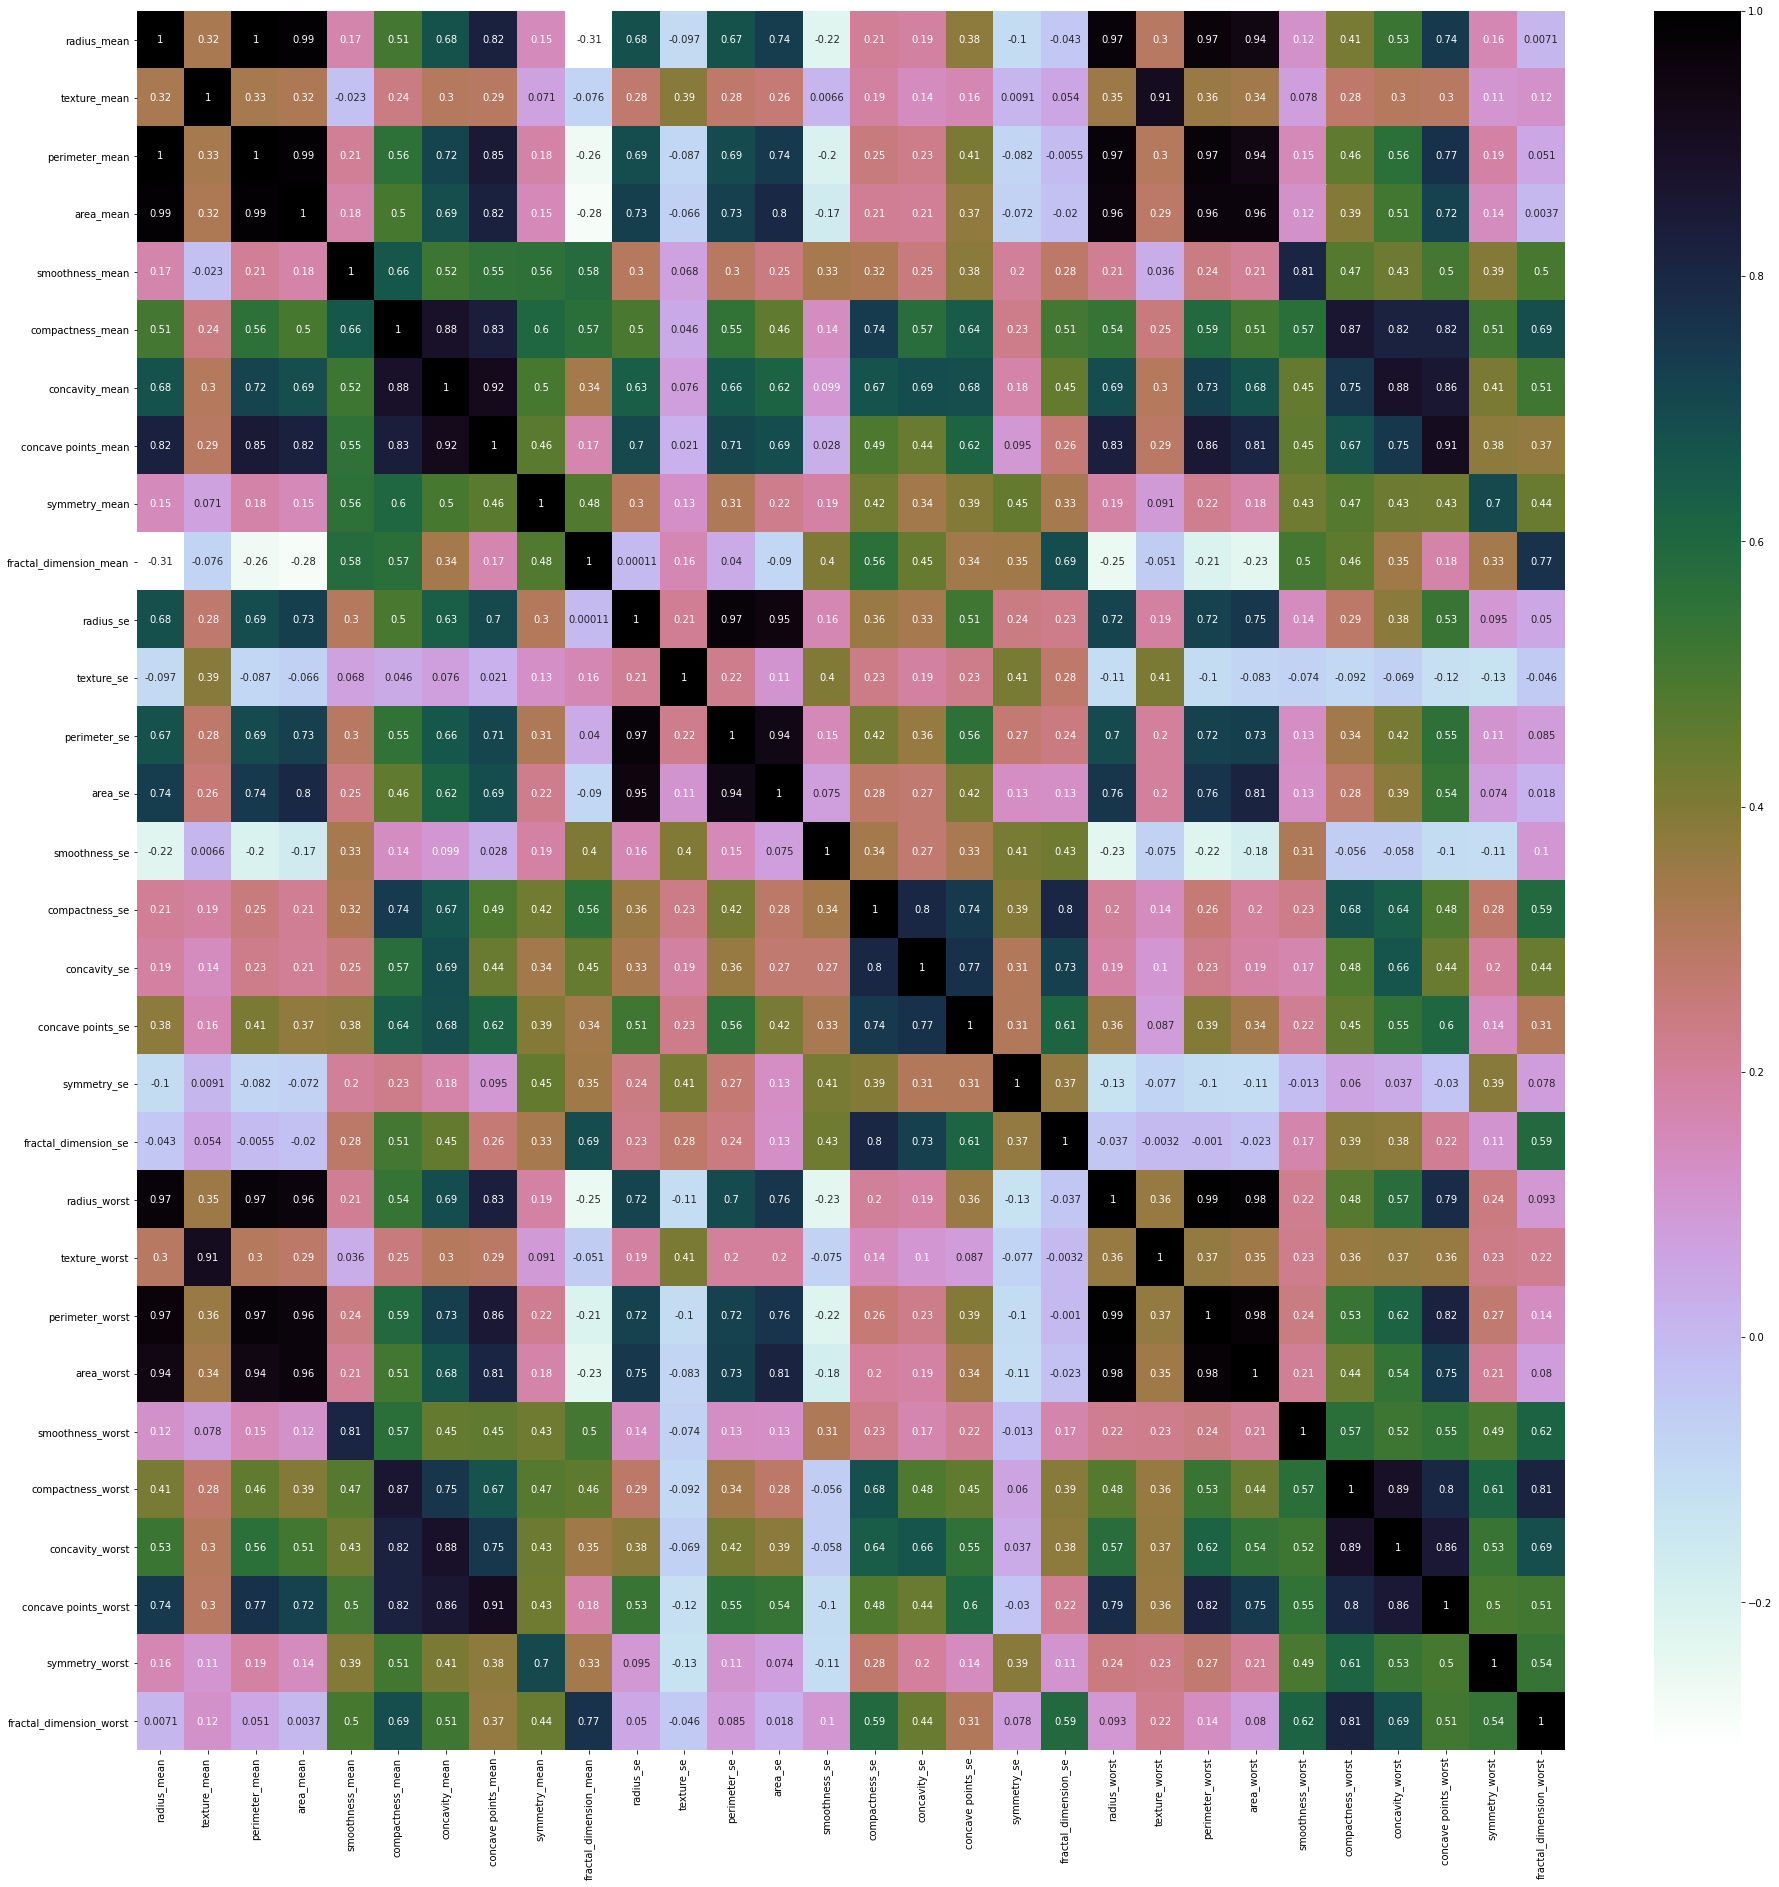

In [ ]:
plt.figure(figsize=(32,32)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

## **Splitting Data into Training set and Test set**

In [ ]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


Training Set1

In [ ]:
train_X = train.iloc[:,1:]
train_y=train.diagnosis
test_X= test.iloc[:,1:] 
test_y =test.diagnosis

## **Label Encoding Data**

In [ ]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

In [ ]:
train_y

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

## **Logistic Regression**

In [ ]:
model = LogisticRegression() 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy is',accuracy_score(prediction,test_y)) 

print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is 0.935672514619883
The classification report is
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.91      0.94      0.92        71

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **Support Vector Machine (SVM)**

In [ ]:
model = SVC()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.8830409356725146
The classification report is
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       117
           1       0.73      1.00      0.84        54

    accuracy                           0.88       171
   macro avg       0.86      0.91      0.88       171
weighted avg       0.91      0.88      0.89       171



## **K-Nearest Neighbours**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f02f7454350>,
 <a list of 10 Text major ticklabel objects>)

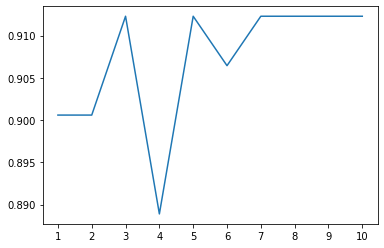

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [ ]:
model=KNeighborsClassifier(n_neighbors=10) 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy of the KNN is 0.9122807017543859
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       108
           1       0.82      0.97      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



## **Naive Bayes**

In [ ]:
model = MultinomialNB()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.8713450292397661
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       115
           1       0.73      0.96      0.83        56

    accuracy                           0.87       171
   macro avg       0.85      0.90      0.86       171
weighted avg       0.90      0.87      0.87       171



## **RandomForest Classifier**

In [ ]:
model = RandomForestClassifier()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.9649122807017544
The classification report is
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       101
           1       0.93      0.99      0.96        70

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## **DecisionTree Classifier**

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.9415204678362573
The classification report is
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        97
           1       0.93      0.93      0.93        74

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## **XGBoost**

In [ ]:
model = XGBClassifier()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.9590643274853801
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       100
           1       0.93      0.97      0.95        71

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## **AdaBoost**

In [ ]:
model = AdaBoostClassifier()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.9532163742690059
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       101
           1       0.92      0.97      0.94        70

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



## **CatBoost**

In [ ]:
model = CatBoostClassifier()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

Learning rate set to 0.006952
0:	learn: 0.6819809	total: 58.5ms	remaining: 58.4s
1:	learn: 0.6711445	total: 66.8ms	remaining: 33.3s
2:	learn: 0.6596310	total: 75.1ms	remaining: 25s
3:	learn: 0.6496279	total: 83.4ms	remaining: 20.8s
4:	learn: 0.6385771	total: 91.5ms	remaining: 18.2s
5:	learn: 0.6293486	total: 99.6ms	remaining: 16.5s
6:	learn: 0.6176152	total: 108ms	remaining: 15.3s
7:	learn: 0.6087836	total: 116ms	remaining: 14.3s
8:	learn: 0.5978225	total: 123ms	remaining: 13.6s
9:	learn: 0.5890184	total: 131ms	remaining: 13s
10:	learn: 0.5800447	total: 139ms	remaining: 12.5s
11:	learn: 0.5712938	total: 147ms	remaining: 12.1s
12:	learn: 0.5617259	total: 155ms	remaining: 11.8s
13:	learn: 0.5537396	total: 163ms	remaining: 11.5s
14:	learn: 0.5453758	total: 171ms	remaining: 11.2s
15:	learn: 0.5370030	total: 179ms	remaining: 11s
16:	learn: 0.5291687	total: 187ms	remaining: 10.8s
17:	learn: 0.5208163	total: 195ms	remaining: 10.6s
18:	learn: 0.5127142	total: 208ms	remaining: 10.7s
19:	learn: 

## **For Training Set2**

## **Selecting Best Features**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:31]  
y = df.iloc[:,0]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


In [ ]:
features=[]
features.append(featureScores.nlargest(10,'Score').Specs.tolist())
print(features[0])

['area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean']


Training Set2

In [ ]:
train_X1 = train[features[0]]
train_y1=train.diagnosis
test_X1= test[features[0]] 
test_y1 =test.diagnosis

In [ ]:
le1 = LabelEncoder()
train_y1 = le1.fit_transform(train_y1)
test_y1 = le1.transform(test_y1)

## **Logistic Regression**

In [ ]:
model = LogisticRegression() 
model.fit(train_X1,train_y1)
prediction=model.predict(test_X1)
print('The accuracy is',accuracy_score(prediction,test_y1)) 

print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is 0.9298245614035088
The classification report is
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       101
           1       0.89      0.94      0.92        70

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **Support Vector Machine (SVM)**

In [ ]:
model = SVC()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is: 0.8888888888888888
The classification report is
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       116
           1       0.74      1.00      0.85        55

    accuracy                           0.89       171
   macro avg       0.87      0.92      0.88       171
weighted avg       0.92      0.89      0.89       171



## **K-Nearest Neighbours**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f02f6178e90>,
 <a list of 10 Text major ticklabel objects>)

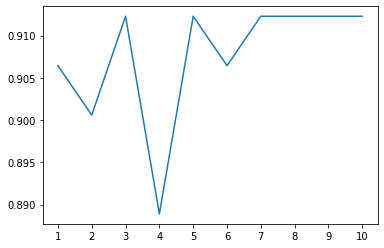

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X1,train_y1)
    prediction=model.predict(test_X1)
    a=a.append(pd.Series(accuracy_score(prediction,test_y1)))
plt.plot(a_index, a)
plt.xticks(x)

In [ ]:
model=KNeighborsClassifier(n_neighbors=10) 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy of the KNN is 0.9122807017543859
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       108
           1       0.82      0.97      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



## **Naive Bayes**

In [ ]:
model = MultinomialNB()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is: 0.8713450292397661
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       115
           1       0.73      0.96      0.83        56

    accuracy                           0.87       171
   macro avg       0.85      0.90      0.86       171
weighted avg       0.90      0.87      0.87       171



## **RandomForest Classifier**

In [ ]:
model = RandomForestClassifier()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is: 0.9298245614035088
The classification report is
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       103
           1       0.88      0.96      0.92        68

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



## **Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is: 0.9064327485380117
The classification report is
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       103
           1       0.85      0.93      0.89        68

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



## **XGBoost**

In [ ]:
model = XGBClassifier()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is: 0.935672514619883
The classification report is
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       104
           1       0.88      0.97      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



## **AdaBoost**

In [ ]:
model = AdaBoostClassifier()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

The accuracy is: 0.935672514619883
The classification report is
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       102
           1       0.89      0.96      0.92        69

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



## **CatBoost**

In [ ]:
model = CatBoostClassifier()
model.fit(train_X1,train_y1) 
prediction=model.predict(test_X1) 
print('The accuracy is:',accuracy_score(prediction,test_y1))
print("The classification report is")
print(classification_report(prediction,test_y1))

Learning rate set to 0.006952
0:	learn: 0.6842424	total: 3.53ms	remaining: 3.52s
1:	learn: 0.6740024	total: 6.61ms	remaining: 3.3s
2:	learn: 0.6642966	total: 10.7ms	remaining: 3.54s
3:	learn: 0.6541660	total: 16.7ms	remaining: 4.16s
4:	learn: 0.6438199	total: 23.1ms	remaining: 4.6s
5:	learn: 0.6334627	total: 29.5ms	remaining: 4.88s
6:	learn: 0.6234795	total: 32.3ms	remaining: 4.59s
7:	learn: 0.6141175	total: 35.3ms	remaining: 4.38s
8:	learn: 0.6056153	total: 40.8ms	remaining: 4.49s
9:	learn: 0.5958901	total: 43.7ms	remaining: 4.32s
10:	learn: 0.5866479	total: 46.5ms	remaining: 4.18s
11:	learn: 0.5783293	total: 49.4ms	remaining: 4.07s
12:	learn: 0.5694574	total: 52.4ms	remaining: 3.98s
13:	learn: 0.5610519	total: 55.2ms	remaining: 3.89s
14:	learn: 0.5533363	total: 58.1ms	remaining: 3.81s
15:	learn: 0.5454365	total: 60.9ms	remaining: 3.75s
16:	learn: 0.5367497	total: 63.7ms	remaining: 3.68s
17:	learn: 0.5292133	total: 66.6ms	remaining: 3.63s
18:	learn: 0.5202858	total: 69.4ms	remaining: 

**Model Trained using Training Set1 performs slightly better than Model Trained using Training Set2 (wrt to accuracies)**
<br/>NoteBook Link : https://colab.research.google.com/drive/1fohErqECnnmm9mwluo0e6JgHiEXhitav#scrollTo=sCGnzun3xDgr